
# Convolutionnal Neural Networks for images


Plan

1. Basics

2. CNN sur Mnist et comparaison avec MLP en fonction nb filtres, des filtersize, du stride etc

3. Utilisation de CNN pour la visualisation (autoencoders)

4. Interprétation des features implémentés par les réseaux de neurones

5. Utilisation d'un réseau préentrainé pour l'annotation d'images

6. A propos de la généricité des features



## 1. Basics

### Loading Mnist data

In [3]:
### Getting, normalizing and putting the data in good shape


from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28
nb_classes =10

##### Chargement des donnees

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (K.image_dim_ordering())

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#input_shape = ( img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Using TensorFlow backend.


tf
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print (X_train.shape)
print (Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


## 2. Learning CNNs on Mnist data 

### To start...

Use the code below to define a CNNs learned "from scratch" with Dropout strategy on Mnist data.


In [5]:
def create_modelCNN_Mnist(nb_classes =10, nb_filters = 32, pool_size=(2,2), kernel_size = (3,3)):
    model1 = Sequential()
    model1.add(Convolution2D(nb_filters, kernel_size,
                             border_mode='valid',
                             input_shape=input_shape))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Convolution2D(nb_filters, kernel_size))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Dropout(0.5))

    model1.add(Flatten())
    model1.add(Dense(100))
    model1.add(Activation('relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(nb_classes))
    model1.add(Activation('softmax'))

    model1.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])
    return(model1)


In [6]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

cnn1 = create_modelCNN_Mnist()    
print (cnn1.summary())

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
__________

In [7]:
import os

# Loading existing weights or learning the model

batch_size = 128
nb_epoch= 1

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnn1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnn1.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch)
    cnn1.save_weights(WEIGHTS_FNAME)
    
score = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
60000/60000 [==============================] - 52s 861us/step - loss: 0.6551 - acc: 0.7876
Test score: 0.12974607977
Test accuracy: 0.9609


### Plotting data and comparing prediction with ground truth

#### To do 
Choose a random image in the dataset, plot it, print its class, the predicted scores for all classes, and the recognized class. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

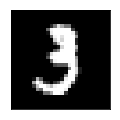

Classe : 3
Score prédit pour chaque classe dans l'ordre croissant :
[  3.79922240e-05   1.33422698e-04   5.90293319e-04   9.97109950e-01
   6.15557099e-07   1.70899497e-03   6.63015214e-07   1.33417025e-05
   1.59401694e-04   2.45411036e-04]
Classe prédite : 3


In [179]:
i = 10  # which digit we will display
plt.figure(figsize=(20, 4))
ax = plt.subplot(2, 1, 1)
plt.imshow(X_train[i].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

print("Classe : %i" %y_train[i])
y_predicted = cnn1.predict(X_train)
print ("Score prédit pour chaque classe dans l'ordre croissant :")
print(y_predicted[i])
print("Classe prédite : %i" %np.argmax(y_predicted[i]))


### Learning CNNs and comparing with MLPs

#### To do

1. Understand and calculate parameter numbers of convolution layers
It is necessary to understand why you get the numbers of the parameters of the different layers of this network. You will be able to see [this paper (beginning of section 2)](https://arxiv.org/pdf/1412.6806v3.pdf) for some explanations on the formulas of standard convolution layers.
    - Why is the first convolution layer defined by only 320 parameters?
    - Comment the call to fit, change the size of the filter kernel_size, and stride, and understand why it has an impact on the number of parameters of this layer.
    - Calculate the number of parameters of the second convolution layer. And in particular the "shape" of the output of this layer.
    - Explain the presence of the Flatten layer. Why does it have no parameters?
    - Explain why the dense layer located after the MaxPooling layer is defined with 80100 parameters?
    - Explain why the layer dense_2 is defined with 1010 parameters?
2. Play (a little) with the CNNs 
    - Modify the network and observe the effect on learning (loss and accuracy)
    - Add in the call to fit an additional argument : validation_data = (X_test, Y_test). Restart the fit and observe the performance in generalization (loss and accuracy) as the learning progresses
    - Remove the Dropout or modify the Dropout rate and observe the effect on network performance
    - Change filter sizes, number of convolution layers, etc.


In [180]:
print(cnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_180 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
activation_297 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_298 (Activation)  (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 5, 5, 32)          0         
__________

#### Question 1.1

In [181]:
print(3*3*32 + 32)

320


Les 320 paramètres s'expliquent par le nombre de filtres multiplié par la surface du kernel, auquel on ajoute 32 fois 1 qui correspond au 32 paramètres introduits par le biais.

#### Question 1.2

In [182]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 4)

cnn1 = create_modelCNN_Mnist(kernel_size = (5, 4))    
print (cnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 24, 25, 32)        672       
_________________________________________________________________
activation_301 (Activation)  (None, 24, 25, 32)        0         
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 8, 9, 32)          20512     
_________________________________________________________________
activation_302 (Activation)  (None, 8, 9, 32)          0         
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 4, 4, 32)          0         
__________

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 4), padding="valid", input_shape=(28, 28, 1...)`
  """


In [183]:
print(5*4*32 + 32)

672


Même explication qu'à la question prédécente

#### Question 1.3

In [184]:
print((32*3*3)*32 + 32)

9248


Pour cette deuxième convolution même processus, on fait 32 fois une convolution avec une grille de 9 neurones sur les 32 filtres obtenus à l'issu de la première convolution. Encore une fois, 32 params supplémentaires sont introduits avec le biais.

#### Question 1.4

Pour le flatten layer, on aplatit dans le but de faire une couche dense derrière. Sa shape est de 800, qui correspond à 5*5*32

#### Question 1.5

Pour le MaxPooling, encore une fois on 800*100 + 100 (biais) résultats sont générés

#### Question 1.6

100*10 + 10 pour le dense_layer2

#### Question 2.1

On tente de modifier le network en supprimant quelques layers :

In [185]:
def nouveau_create_modelCNN_Mnist(nb_classes =10, nb_filters = 32, pool_size=(2,2), kernel_size = (3,3)):
    model1 = Sequential()
    model1.add(Convolution2D(nb_filters, kernel_size,
                             border_mode='valid',
                             input_shape=input_shape))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Flatten())
    model1.add(Dense(100))
    model1.add(Activation('relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(nb_classes))
    model1.add(Activation('softmax'))

    model1.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])
    return(model1)

In [186]:
cnn1 = nouveau_create_modelCNN_Mnist(kernel_size = (3,3))

batch_size = 128
nb_epoch= 1

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnn1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnn1.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data = (X_test, Y_test))
    cnn1.save_weights(WEIGHTS_FNAME)
    
score = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 17s - loss: 0.4611 - acc: 0.8658 - val_loss: 0.1595 - val_acc: 0.9514
Test score: 0.159452083945
Test accuracy: 0.9514


Le score est moins bon !

#### Question 2.2

On reprend le premier modèle et on ajoute ledit argument au call du fit :

In [187]:
cnn1 = create_modelCNN_Mnist(kernel_size = (3,3))

batch_size = 128
nb_epoch= 1

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnn1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnn1.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data = (X_test, Y_test))
    cnn1.save_weights(WEIGHTS_FNAME)
    
score = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s - loss: 0.6306 - acc: 0.7976 - val_loss: 0.1347 - val_acc: 0.9611
Test score: 0.134663538911
Test accuracy: 0.9611


On observe un léger mieux avec ce nouvel argument

#### Question 2.3

In [188]:
def create_modelCNN_Mnist(nb_classes =10, nb_filters = 32, pool_size=(2,2), kernel_size = (3,3), drop = 0.5):
    model1 = Sequential()
    model1.add(Convolution2D(nb_filters, kernel_size,
                             border_mode='valid',
                             input_shape=input_shape))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Convolution2D(nb_filters, kernel_size))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Dropout(drop))

    model1.add(Flatten())
    model1.add(Dense(100))
    model1.add(Activation('relu'))
    model1.add(Dropout(drop))
    model1.add(Dense(nb_classes))
    model1.add(Activation('softmax'))

    model1.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])
    return(model1)

In [189]:
cnn1 = create_modelCNN_Mnist(drop = 0.9)

batch_size = 128
nb_epoch= 1

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnn1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnn1.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data = (X_test, Y_test))
    cnn1.save_weights(WEIGHTS_FNAME)
    
score = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s - loss: 2.3033 - acc: 0.1239 - val_loss: 2.2121 - val_acc: 0.5215
Test score: 2.21207227097
Test accuracy: 0.5215


Bien évidemment, une grosse chute du score avec un gros dropout

## 3. CNN autoencoder for visualization 

### Example of convolution autoencoder


* Vous trouverez ci dessous un exemple d'autoencoder convolutionnel emprunté ici: https://blog.keras.io/building-autoencoders-in-keras.html 
 

In [190]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Using a convolutional autoencoder to visualize data

#### To do

* Explain the architecture of the deep autoencoder and in particular how the decoder is built 
* Modify the above autoencoder architecture to allow projecting data in a 2 dimensional space.
* Project Mnist data using the deep convolutional autoencoder and plot the projections




In [191]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
encoded = Dense(2)(x)

x = Dense(128)(encoded)
x = Reshape((4, 4, 8))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [192]:
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 4, 4, 8)           0         
__________

In [193]:
autoencoder.fit(X_train, X_train,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 57s - loss: 0.2722 - val_loss: 0.2413
Epoch 2/3
60000/60000 [==============================] - 55s - loss: 0.2396 - val_loss: 0.2348
Epoch 3/3
60000/60000 [==============================] - 55s - loss: 0.2338 - val_loss: 0.2292


Affichons les reconstructions des images avec ce nouvel autoencoder

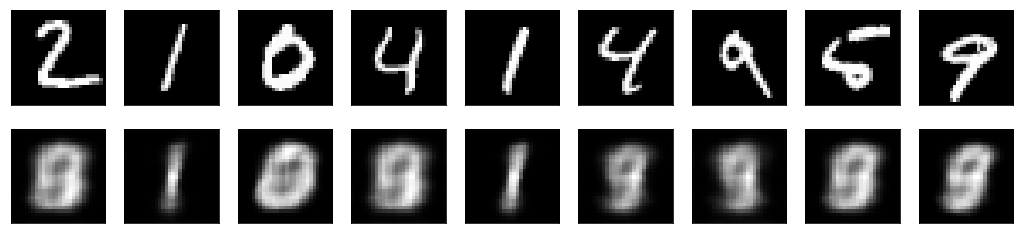

In [194]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Affichons également le résultat en 2D renvoyé par l'autoencoder, comme nous avons pu le faire au TP précédent

In [195]:
encoder = Model(input_img, encoded)

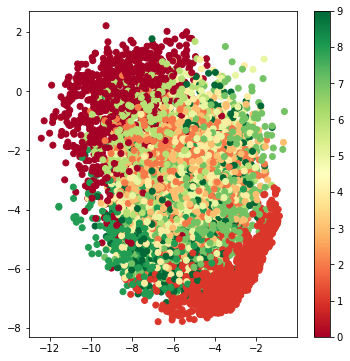

In [196]:
x_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.show()

## 4. Visualizing network's filters

Part of the code below comes from [explanations](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) and [code](https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py) from F. Chollet   

You may also read (if you are strongly interested in discovering what your deep network has learned) [this paper](http://www.dumitru.ca/files/publications/invariances_techreport.pdf)

First we create the same network as above while naming the layers (more confortable) using : name ="...."

In [197]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size, name = "Conv1",
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu', name="Conv1Relu"))
model.add(Convolution2D(nb_filters, kernel_size, name = "Conv2"))
model.add(Activation('relu', name="Conv2Relu"))
model.add(MaxPooling2D(pool_size=pool_size, name = "Pool2"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100, activation='relu', name = "Dense1"))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax', name = "Dense2"))
#model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

print (model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 25, 32)        672       
_________________________________________________________________
Conv1Relu (Activation)       (None, 24, 25, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 20, 22, 32)        20512     
_________________________________________________________________
Conv2Relu (Activation)       (None, 20, 22, 32)        0         
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 10, 11, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 10, 11, 32)        0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 3520)              0         
__________

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 4), padding="valid", input_shape=(28, 28, 1..., name="Conv1")`
  """


### Visualizing the filter weights


Le code utilisé ici est emprunté pour majeure partie à http://bookcode.polossk.com/Deep-Learning-Notebook/html/note01-mnist-cnn.html.

In [198]:
cnn1 = create_modelCNN_Mnist()    
print (cnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
activation_316 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_317 (Activation)  (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 5, 5, 32)          0         
__________

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


In [199]:
batch_size = 128
nb_epoch= 1

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnn1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnn1.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
               validation_data=(X_test, Y_test))
    cnn1.save_weights(WEIGHTS_FNAME)
    
score = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s - loss: 0.6604 - acc: 0.7858 - val_loss: 0.1355 - val_acc: 0.9602
Test score: 0.135462748244
Test accuracy: 0.9602


In [200]:
from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
from keras import backend as K 
%matplotlib inline

label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


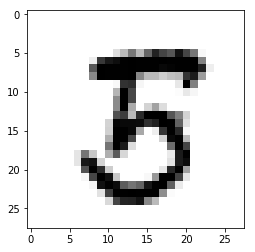

In [201]:
i = 4600
pl.imshow(X_train[i, :,: ,0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [202]:
print(cnn1.summary())
print(cnn1.predict(X_test[1:5]))
print(Y_test[1:5])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
activation_316 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_317 (Activation)  (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 5, 5, 32)          0         
__________

In [203]:
convout1_f = K.function([cnn1.layers[0].input], [cnn1.layers[1].output])
convout2_f = K.function([cnn1.layers[0].input], [cnn1.layers[2].output])
print (cnn1.layers[3])


In [204]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

(1, 28, 28, 1)


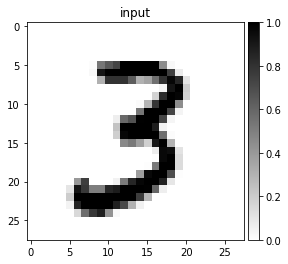

In [205]:
i = 4600

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1, : ,: ,:]
print (X.shape)
pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

In [206]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[2]
    imshape = imgs.shape[0:2]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:,:, i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

W shape :  (3, 3, 32)


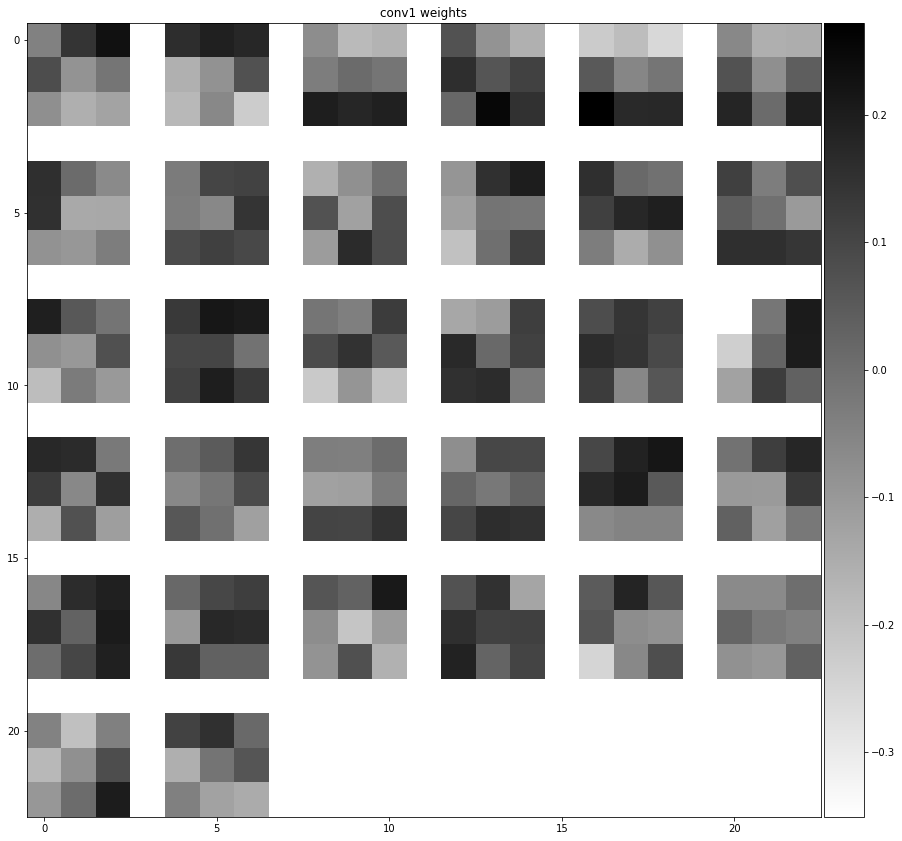

In [207]:
# Visualize weight
W = cnn1.get_weights()[0]
#W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)


pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)

C1 shape :  (26, 26, 32)


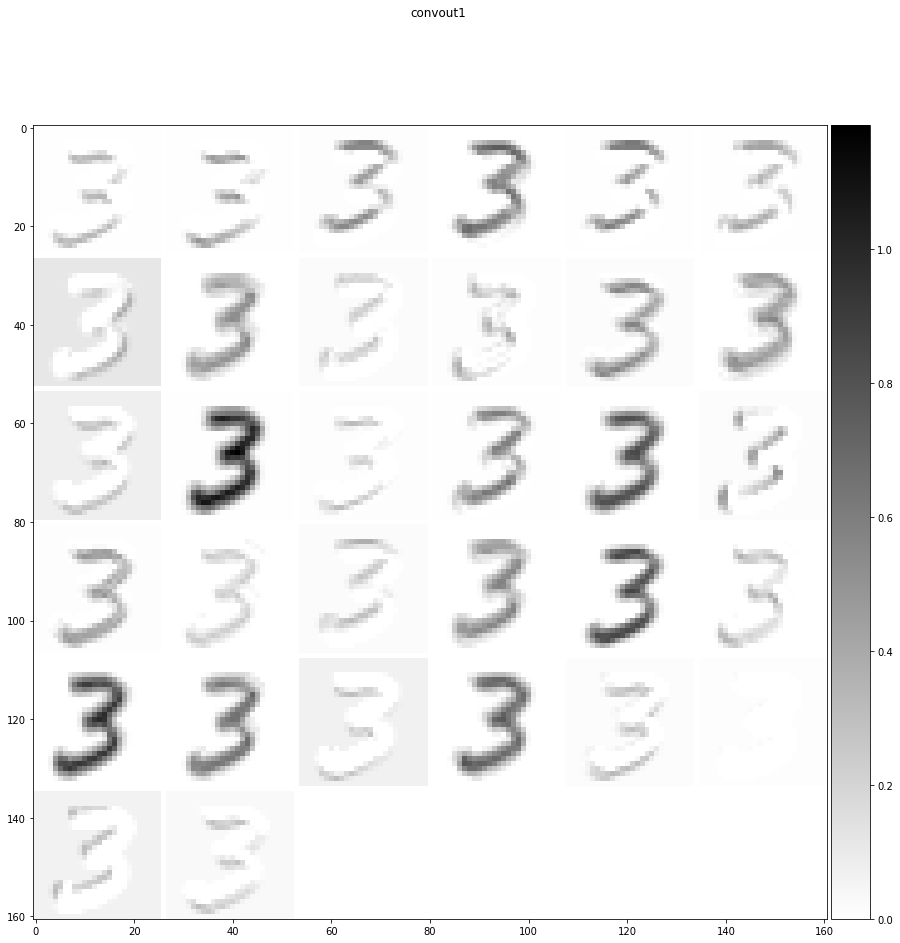

In [208]:
# Visualize convolution result (after activation)
C1 = convout1_f([X])
C1 = np.squeeze([C1])
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)

C2 shape :  (13, 13, 32)


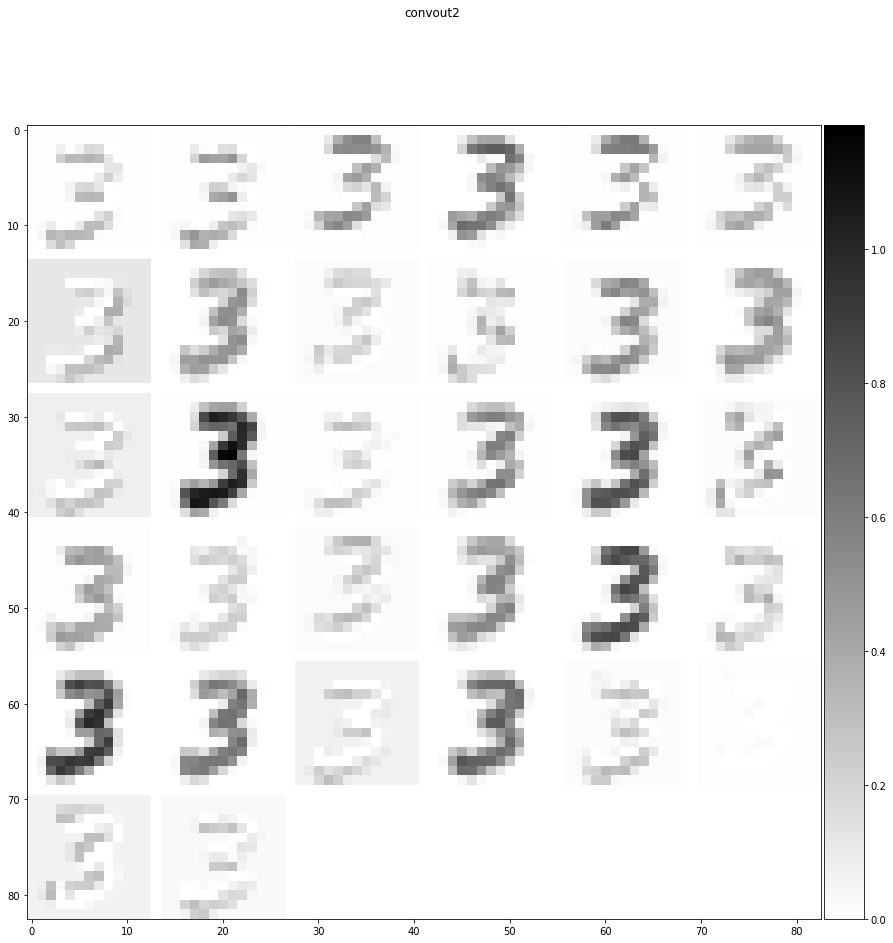

In [209]:
# Visualize convolution result (after activation)
C2 = convout2_f([X])
C2 = np.squeeze([C2])
print("C2 shape : ", C2.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout2')
nice_imshow(pl.gca(), make_mosaic(C2, 6, 6), cmap=cm.binary)

### Finding optimal stimulus for a hidden filter (Facultative part) 

#### Understanding what does a filter ( a neuron in a particular layer, hidden or output) by looking at the input image that activates it most

#### To do 

Using procedures of TP2 define functions that will allow you to find the input that maximizes a given hidden cell of a specified hidden layer by gradient ascent.

## Utilisation de réseaux préentrainés 

### To do 

En vous aidant d'exemples (voir la page  https://keras.io/applications/#usage-examples-for-image-classification-models) écrivez le code nécessaire pour appliquer un modèle existant appris sur la base de données Imagenet (parmi les modèles ResNet50, InceptionV3, Xception, VGG16), en récupérant les architectures et les poids des modèles, sur des images que vous récupererez sur internet. Vous devez écrire une fonction qui, pour une image donnée, affiche les prédictions de deux ou trois des modèles ci-dessus.
 
A noter que le preprocessing a appliquer est différent suivant le modèle. Il s'agit de preprocess_input de keras.applications.inception_v3 ou de keras.applications.imagenet_utils selon les cas.

A noter également que tous les modèles ci dessus opèrent sur des images au format (224,224) sauf InceptionV3 et Xception considèrent des images au format (229, 229).


### ResNet50

In [210]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [211]:
img_path = 'zebra.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Zèbre')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'flower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Rhododendron')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'tie.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Costard cravate')
print('Predicted:', decode_predictions(preds, top=3)[0])


Zèbre
Predicted: [(u'n02391049', u'zebra', 0.99778277), (u'n02422106', u'hartebeest', 0.0014597389), (u'n02422699', u'impala', 0.00024407858)]
Rhododendron
Predicted: [(u'n11939491', u'daisy', 0.25601271), (u'n12985857', u'coral_fungus', 0.12404181), (u'n02206856', u'bee', 0.086140551)]
Costard cravate
Predicted: [(u'n04350905', u'suit', 0.98069376), (u'n04591157', u'Windsor_tie', 0.015505948), (u'n02883205', u'bow_tie', 0.0030662233)]


### VGG16

In [212]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

In [213]:
img_path = 'zebra.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Zèbre')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'flower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Rhododendron')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'tie.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Costard cravate')
print('Predicted:', decode_predictions(preds, top=3)[0])


Zèbre
Predicted: [(u'n02391049', u'zebra', 0.99945766), (u'n02423022', u'gazelle', 0.00017846779), (u'n02422699', u'impala', 0.00012148795)]
Rhododendron
Predicted: [(u'n09256479', u'coral_reef', 0.45577544), (u'n03991062', u'pot', 0.048009753), (u'n04399382', u'teddy', 0.046604507)]
Costard cravate
Predicted: [(u'n04350905', u'suit', 0.96258932), (u'n04591157', u'Windsor_tie', 0.027539918), (u'n02883205', u'bow_tie', 0.0045481725)]


### InceptionV3 

In [214]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

model = InceptionV3(weights='imagenet', include_top=True)

In [215]:
img_path = 'zebra.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Zèbre')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'flower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Rhododendron')
print('Predicted:', decode_predictions(preds, top=3)[0])

img_path = 'tie.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Costard cravate')
print('Predicted:', decode_predictions(preds, top=3)[0])

Zèbre
Predicted: [(u'n04286575', u'spotlight', 0.92956507), (u'n06359193', u'web_site', 0.068708554), (u'n03584829', u'iron', 0.0016488063)]
Rhododendron
Predicted: [(u'n03047690', u'clog', 1.0), (u'n04328186', u'stopwatch', 2.1809854e-09), (u'n04286575', u'spotlight', 3.0414911e-20)]
Costard cravate
Predicted: [(u'n06359193', u'web_site', 1.0), (u'n03481172', u'hammer', 3.9898635e-18), (u'n03627232', u'knot', 2.2896067e-31)]


## Genericity of deep features


### To do 

Features that are extracted by NN in their hidden layers are known to be generic  

To study this property we will consider two 5-classes classification tasks based on the Mnist dataset: Classifying digits 0 to 4 (task A, and DatasetA) and classifying digits 5 to 9 (task B and DatasetB). 

1/ Learn a NN on Mnist data using data from classes 0 to 4, or data from classes 5 to 9. Learn a model for each task using the whole dataset, NNA and NNB, and for limited training datasets where the number of training samples  per class is equal to 10, 100, 1000, or 5000. All models have the same default architecture as defined in the function create_modelCNN_Mnist defined at the top of this notebook.

2/ Use NNA to initialize models that will be learned on DatasetB. The models have the same architecture but their weights are initialized from those of NNA up to layer number 1, 2 or 3 (other weights are initailized randomly). The models are retrained using data from taskB with datasets of various sizes. Weights initialized from NNA may be frozen or trainable.

The same procedure should be applied to use NNB to initialize models that will be retrained on TaskA and datasets A.

3/ Analyze your results and comment on these.





In [8]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Question 1

Toujours un problème à cette question, je ne comprends pas pourquoi le code suivant ne permet pas de bien choisir la taille du set sur lequel on travaille

On travaille donc avec le set tout entier

In [10]:
A = [0, 1, 2, 3, 4]
B = [5, 6, 7, 8, 9]

dsA_x_train = []
dsA_x_test = []
dsB_x_train = []
dsB_x_test = []

dsA_y_train = []
dsA_y_test = []
dsB_y_train = []
dsB_y_test = []

for i in range(len(X_train)):
    if y_train[i] in A:
        dsA_x_train.append(X_train[i])
        dsA_y_train.append(Y_train[i])
    else:
        dsB_x_train.append(X_train[i])
        dsB_y_train.append(Y_train[i])
        
for i in range(len(X_test)):
    if y_test[i] in A:
        dsA_x_test.append(X_test[i])
        dsA_y_test.append(Y_test[i])
    else:
        dsB_x_test.append(X_test[i])
        dsB_y_test.append(Y_test[i])

dsA_x_train = np.array(dsA_x_train)
dsA_x_test = np.array(dsA_x_test)
dsB_x_train = np.array(dsB_x_train)
dsB_x_test = np.array(dsB_x_test)

dsA_y_train = np.array(dsA_y_train)
dsA_y_test = np.array(dsA_y_test)
dsB_y_train = np.array(dsB_y_train)
dsB_y_test = np.array(dsB_y_test)

In [11]:
print(dsA_x_train.shape)
print(dsA_y_train.shape)
print(dsB_x_train.shape)
print(dsB_y_train.shape)
print(dsA_y_train[3])
print(dsB_y_train[4])

(30596, 28, 28, 1)
(30596, 10)
(29404, 28, 28, 1)
(29404, 10)
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [12]:
# On relance cette fonction pour éviter des problèmes avec tous les changements faits
# dans le cadre des questions 1 et 2

def create_modelCNN_Mnist(nb_classes = 10, nb_filters = 32, pool_size=(2,2), kernel_size = (3,3)):
    model1 = Sequential()
    model1.add(Convolution2D(nb_filters, kernel_size,
                             border_mode='valid',
                             input_shape=input_shape))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Convolution2D(nb_filters, kernel_size))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=pool_size))
    model1.add(Dropout(0.5))

    model1.add(Flatten())
    model1.add(Dense(100))
    model1.add(Activation('relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(nb_classes))
    model1.add(Activation('softmax'))

    model1.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])
    return(model1)

In [13]:
cnna = create_modelCNN_Mnist()  

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnna.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnna.fit(dsA_x_train, dsA_y_train, batch_size=batch_size, nb_epoch=nb_epoch)
    
score = cnna.evaluate(dsA_x_train, dsA_y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  


Epoch 1/1
30596/30596 [==============================] - 26s 846us/step - loss: 0.4384 - acc: 0.8517 0s - loss: 0.4509 - a
Test score: 0.0728176274386
Test accuracy: 0.97770950451


In [14]:
cnna.save_weights('A_weights.hdf')

In [15]:
cnnb = create_modelCNN_Mnist()  

WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'

if False and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    cnnb.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 1
    WEIGHTS_FNAME = 'Mnist_Cnn_My_weights.hdf'
    cnnb.fit(dsB_x_train, dsB_y_train, batch_size=batch_size, nb_epoch=nb_epoch)
    
score = cnnb.evaluate(dsB_x_train, dsB_y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  


Epoch 1/1
29404/29404 [==============================] - 25s 860us/step - loss: 0.6023 - acc: 0.7850
Test score: 0.124134876773
Test accuracy: 0.958645082277


In [16]:
cnnb.save_weights('B_weights.hdf')

#### Question 2

In [17]:
modele_a_bis = create_modelCNN_Mnist() 
modele_a_bis.load_weights('A_weights.hdf')
modele_a_bis.pop()
modele_a_bis.pop()
modele_a_bis.add(Dense(10))
modele_a_bis.add(Activation('softmax'))

for layer in modele_a_bis.layers[:-2]:
    layer.trainable = False

modele_a_bis.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  


In [18]:
batch_size = 128
nb_epoch = 6
modele_a_bis.fit(dsB_x_train, dsB_y_train, batch_size=batch_size, nb_epoch=nb_epoch)
score = modele_a_bis.evaluate(dsB_x_train, dsB_y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
29404/29404 [==============================] - 8s 287us/step - loss: 2.1510 - acc: 0.2663
Epoch 2/6
29404/29404 [==============================] - 8s 258us/step - loss: 1.3056 - acc: 0.4948
Epoch 3/6
29404/29404 [==============================] - 7s 254us/step - loss: 1.0654 - acc: 0.5858
Epoch 4/6
29404/29404 [==============================] - 8s 255us/step - loss: 0.9471 - acc: 0.6399
Epoch 5/6
29404/29404 [==============================] - 8s 257us/step - loss: 0.8765 - acc: 0.6697
Epoch 6/6
29404/29404 [==============================] - 8s 259us/step - loss: 0.8355 - acc: 0.6916
Test score: 0.563239651413
Test accuracy: 0.85291116854


In [19]:
modele_b_bis = create_modelCNN_Mnist() 
modele_b_bis.load_weights('B_weights.hdf')
modele_b_bis.pop()
modele_b_bis.pop()
modele_b_bis.add(Dense(10))
modele_b_bis.add(Activation('softmax'))

for layer in modele_b_bis.layers[:-2]:
    layer.trainable = False

modele_b_bis.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  


In [22]:
modele_b_bis.fit(dsA_x_train, dsA_y_train, batch_size=batch_size, nb_epoch=nb_epoch)
score = modele_b_bis.evaluate(dsA_x_train, dsA_y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
30596/30596 [==============================] - 9s 282us/step - loss: 0.6892 - acc: 0.7608
Epoch 2/6
30596/30596 [==============================] - 9s 281us/step - loss: 0.6644 - acc: 0.7672
Epoch 3/6
30596/30596 [==============================] - 9s 280us/step - loss: 0.6576 - acc: 0.7703
Epoch 4/6
30596/30596 [==============================] - 8s 273us/step - loss: 0.6437 - acc: 0.7758
Epoch 5/6
30596/30596 [==============================] - 8s 270us/step - loss: 0.6336 - acc: 0.7823
Epoch 6/6
30596/30596 [==============================] - 8s 275us/step - loss: 0.6274 - acc: 0.7826
Test score: 0.394330810551
Test accuracy: 0.899725454308


Les résultats sont concluants ! En seulement 6 epochs on se retrouve avec une accuracy de près de 90% avec les deux nouveau modèls donc seuls les 2 derniers layers sont trainable.
On constate également que le CNN a vraiment beaucoup changé malgré ces seules deux dernières couches, puisque les score sur les datasets d'origine se sont effondrés comme on le montre juste ci-dessous :

In [24]:
scoreA = modele_a_bis.evaluate(dsA_x_train, dsA_y_train, verbose=0)
scoreB = modele_b_bis.evaluate(dsB_x_train, dsB_y_train, verbose=0)
print('Test score A sur A :', scoreA[0])
print('Test accuracy A sur A :', scoreA[1])
print('Test score B sur B :', scoreB[0])
print('Test accuracy B sur B :', scoreB[1])

Test score A sur A : 13.4530864656
Test accuracy A sur A : 0.0
Test score B sur B : 15.3464059529
Test accuracy B sur B : 0.0
